In [1]:
import pandas as pd

# Sample data
sales = pd.DataFrame({
    'Region': ['North', 'South', 'East', 'West', 'North', 'South'],
    'Month': ['Jan', 'Jan', 'Jan', 'Jan', 'Feb', 'Feb'],
    'Sales': [25000, 18000, 22000, 20000, 27000, 19000]
})

ads = pd.DataFrame({
    'Region': ['North', 'South', 'East', 'West'],
    'Ad_Spend': [5000, 3000, 4000, 3500]
})

region_info = pd.DataFrame({
    'Region': ['North', 'South', 'East', 'West'],
    'Manager': ['Alice', 'Bob', 'Clara', 'David']
})

print(sales.head())

  Region Month  Sales
0  North   Jan  25000
1  South   Jan  18000
2   East   Jan  22000
3   West   Jan  20000
4  North   Feb  27000


In [2]:
print(region_info.head())

  Region Manager
0  North   Alice
1  South     Bob
2   East   Clara
3   West   David


In [3]:
print(ads.head())

  Region  Ad_Spend
0  North      5000
1  South      3000
2   East      4000
3   West      3500


In [4]:
## Step 2: Data Cleaning
# # Check for missing values
print(sales.isnull().sum())

## remove duplicate if any
sales.drop_duplicates(inplace=True)

## Standardize region name
sales['Region'] = sales['Region'].str.title()

Region    0
Month     0
Sales     0
dtype: int64


In [5]:
# “Standardize region names” means make all the region names follow the same style or format so they look consistent.

# For example, if your data has region names like:

# "north"

# "North "

# "NORTH"

# "north "

# Standardizing them with .str.title() will turn all of them into:

# "North"



In [6]:
# Step 3: Joining DataFrame
# join sales and region  info  and  ad  spend
merged = pd.merge(sales,region_info,on='Region',how='left')
merged = pd.merge(merged,ads,on='Region',how='left')
print(merged)

  Region Month  Sales Manager  Ad_Spend
0  North   Jan  25000   Alice      5000
1  South   Jan  18000     Bob      3000
2   East   Jan  22000   Clara      4000
3   West   Jan  20000   David      3500
4  North   Feb  27000   Alice      5000
5  South   Feb  19000     Bob      3000


In [7]:
merged

,Region,Month,Sales,Manager,Ad_Spend
0,North,Jan,25000,Alice,5000
1,South,Jan,18000,Bob,3000
2,East,Jan,22000,Clara,4000
3,West,Jan,20000,David,3500
4,North,Feb,27000,Alice,5000
5,South,Feb,19000,Bob,3000


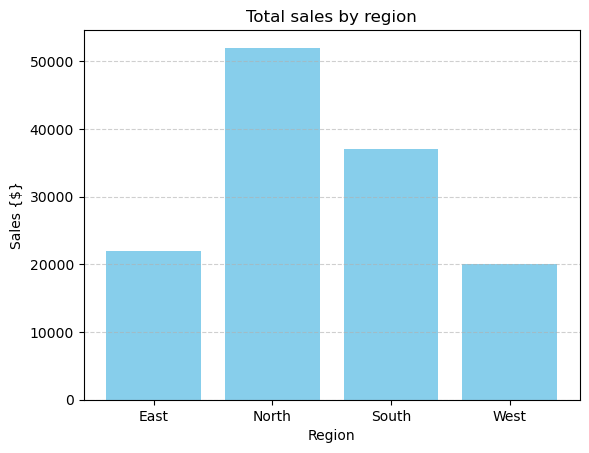

In [8]:
## Visualizing Insights
# (a) Bar Chart — Sales by Region
import matplotlib.pyplot as plt
region_sales = merged.groupby('Region')['Sales'].sum()
plt.bar(region_sales.index,region_sales.values,color='skyblue')
plt.xlabel('Region')
plt.ylabel('Sales {$}')
plt.title('Total sales by region')
plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.show()


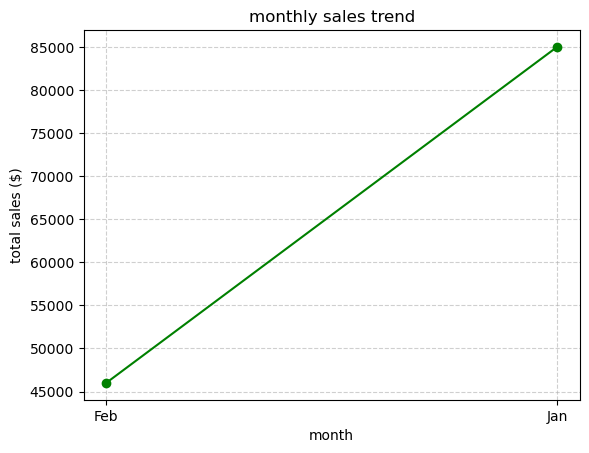

In [9]:
# (b) Line Chart — Monthly Trend

monthly_sales = merged.groupby('Month')['Sales'].sum()
monthly_sales
plt.plot(monthly_sales.index,monthly_sales.values,marker='o',color='green')

plt.title('monthly sales trend')
plt.xlabel('month')
plt.ylabel('total sales ($)')
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

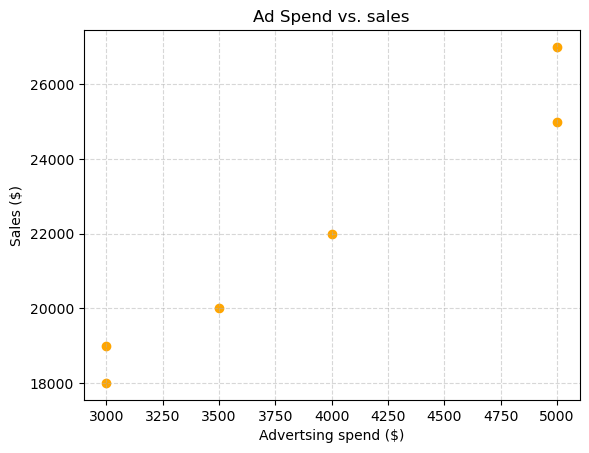

In [10]:
## Scatter plot
plt.scatter(merged['Ad_Spend'],merged['Sales'],color='orange')
plt.title('Ad Spend vs. sales')
plt.xlabel('Advertsing spend ($)')
plt.ylabel('Sales ($)')
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

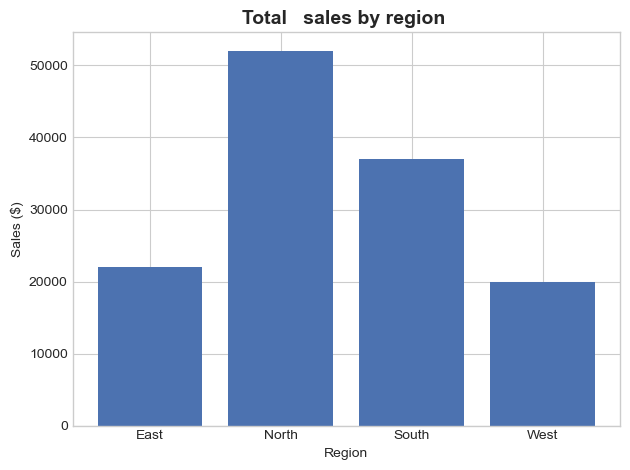

In [12]:
## Applying Design Principles
plt.style.use('seaborn-v0_8-whitegrid')
plt.bar(region_sales.index,region_sales.values,color='#4C72B0')
plt.title("Total   sales by region ",fontsize=14,weight='bold')
plt.xlabel("Region")
plt.ylabel('Sales ($)')
plt.tight_layout()
plt.show()